### Analyzing tmdb-movies.csv dataset.
### Which genres are most popular from year to year?
### How have average budgets and revenues changed over the years?
### Is there a relationship between a movie's popularity and its average vote?

In [3]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
  Using cached pandas-0.25.0.tar.gz (12.6 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [1061 lines of output]
      /opt/conda/envs/scipy-tutorials-2023/lib/python3.10/site-packages/setuptools/__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
      !!
      
              ********************************************************************************
              Requirements should be satisfied by a PEP 517 installer.
              If you are using pip, you can try `pip install --use-pep517`.
              ********************************************************************************
      
      !!
        dist.fetch_build_eggs(dist.setup_requires)
      running bdist_wheel
      running build
     

In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df= pd.read_csv('tmdb-movies.csv')
df.head()

id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      http://www.jurassicworld.com/   Colin Trevorrow   
1                        http://www.madmaxmovie.com/     George Miller   
2     http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   
3  http://www.starwars.com/films/star-wars-episod...       J.J. Abrams   
4                           http://www.furious7.com/         James Wan   

                         tagline  ...  \
0              The park is open.  ...   
1             What a Lovely Day.  ...   
2     One Choice Can Destroy You  ...   
3  Every generation has a story.  ...   
4            Vengeance Hits Home  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   
3  Thirty years after defeating the Galactic Empi...     136   
4  Deckard Shaw seeks revenge against Dominic Tor...     137   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   
3   Action|Adventure|Science Fiction|Fantasy   
4                      Action|Crime|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   
3          Lucasfilm|Truenorth Productions|Bad Robot     12/15/15       5292   
4  Universal Pictures|Original Film|Media Rights ...       4/1/15       2947   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  
3           7.5          2015  1.839999e+08  1.902723e+09  
4           7.3          2015  1.747999e+08  1.385749e+09  

[5 rows x 21 columns]

## Check for missing values with `isna()`

In [7]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

## Clean the values

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df1=df.copy()
#df.dropna(subset=['budget', 'revenue', 'cast', 'director', 'genres'], inplace=True)
zero_cols=['budget', 'revenue', 'cast', 'director', 'genres']
df1[zero_cols]=df1[zero_cols].apply(lambda cols: cols.replace(0,np.nan), axis=1)
df1.describe()

id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  5.170000e+03  4.850000e+03  10866.000000   
mean    66064.177434      0.646441  3.073943e+07  8.922066e+07    102.070863   
std     92130.136561      1.000185  3.890065e+07  1.620684e+08     31.381405   
min         5.000000      0.000065  1.000000e+00  2.000000e+00      0.000000   
25%     10596.250000      0.207583  6.000000e+06  7.708081e+06     90.000000   
50%     20669.000000      0.383856  1.700000e+07  3.182654e+07     99.000000   
75%     75610.000000      0.713817  4.000000e+07  9.991823e+07    111.000000   
max    417859.000000     32.985763  4.250000e+08  2.781506e+09    900.000000   

         vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  10866.000000  10866.000000  10866.000000  1.086600e+04  1.086600e+04  
mean     217.389748      5.974922   2001.322658  1.755104e+07  5.136436e+07  
std      575.619058      0.935142     12.812941  3.430616e+07  1.446325e+08  
min       10.000000      1.500000   1960.000000  0.000000e+00  0.000000e+00  
25%       17.000000      5.400000   1995.000000  0.000000e+00  0.000000e+00  
50%       38.000000      6.000000   2006.000000  0.000000e+00  0.000000e+00  
75%      145.750000      6.600000   2011.000000  2.085325e+07  3.369710e+07  
max     9767.000000      9.200000   2015.000000  4.250000e+08  2.827124e+09

## Drop the missing values

In [11]:
df.dropna(inplace=True)
df.describe()

id   popularity        budget       revenue      runtime  \
count    1992.000000  1992.000000  1.992000e+03  1.992000e+03  1992.000000   
mean    71652.152108     1.316763  3.454924e+07  1.152153e+08   106.040161   
std     92355.883915     1.873563  5.061878e+07  2.202887e+08    29.234592   
min        11.000000     0.000620  0.000000e+00  0.000000e+00     0.000000   
25%      9699.000000     0.384079  0.000000e+00  0.000000e+00    92.000000   
50%     35112.500000     0.774223  1.500000e+07  2.578782e+07   102.000000   
75%     83573.000000     1.538639  4.800000e+07  1.278787e+08   116.000000   
max    414419.000000    32.985763  4.250000e+08  2.781506e+09   705.000000   

        vote_count  vote_average  release_year    budget_adj   revenue_adj  
count  1992.000000   1992.000000   1992.000000  1.992000e+03  1.992000e+03  
mean    643.616968      6.178614   2007.796687  3.627376e+07  1.302391e+08  
std    1092.355998      0.881955      7.549224  5.129783e+07  2.564338e+08  
min      10.000000      2.100000   1961.000000  0.000000e+00  0.000000e+00  
25%      51.000000      5.600000   2006.000000  0.000000e+00  0.000000e+00  
50%     210.000000      6.200000   2010.000000  1.524601e+07  2.806370e+07  
75%     688.250000      6.800000   2012.000000  5.064450e+07  1.393645e+08  
max    9767.000000      8.300000   2015.000000  4.250000e+08  2.827124e+09

In [12]:
df.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

### Research Question 1  (Genre Analysis!)

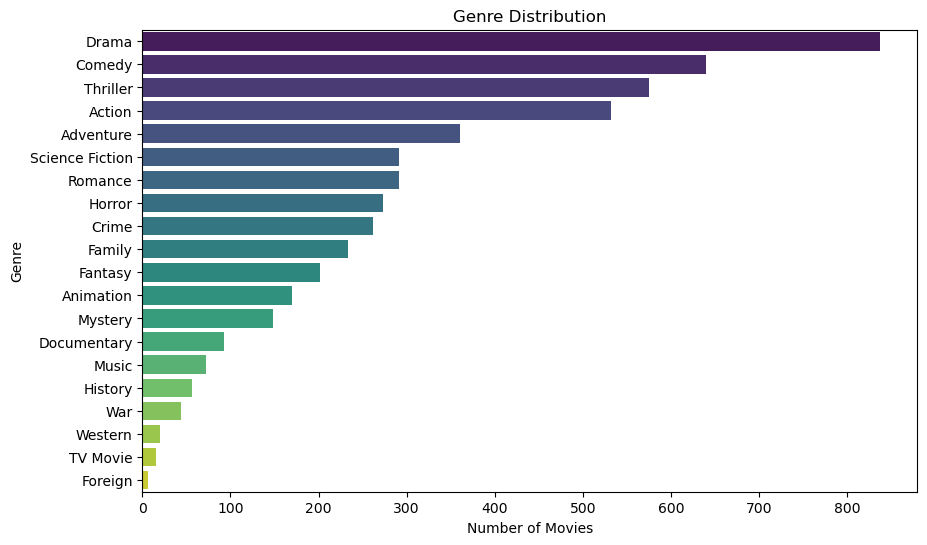

In [14]:
genre_counts = df['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Genre Distribution')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

## Reasoning:
## The genre distribution chart provides insights into the popularity of different movie genres in the dataset. From the chart, we can observe that Drama, Comedy, and Thriller are the most common genres among the movies. This indicates a strong preference for these genres in the dataset. On the other hand, TV Movie and Western are among the least common genres, suggesting that they are less prevalent in the dataset.


### Research Question 2  (Budget and Revenue Trends Over Years!)

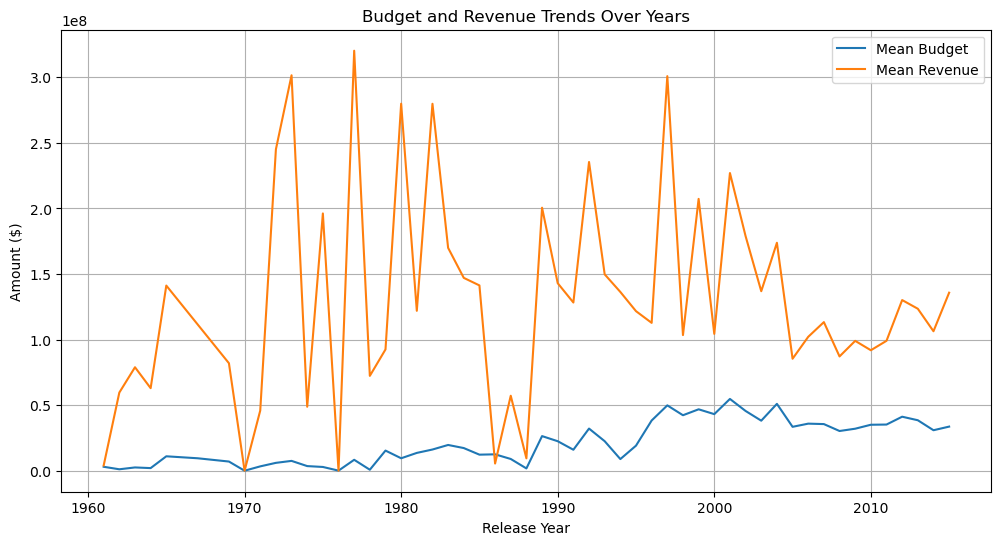

In [17]:
yearly_budget_revenue = df.groupby('release_year')[['budget', 'revenue']].mean()
plt.figure(figsize=(12, 6))
plt.plot(yearly_budget_revenue.index, yearly_budget_revenue['budget'], label='Mean Budget')
plt.plot(yearly_budget_revenue.index, yearly_budget_revenue['revenue'], label='Mean Revenue')
plt.title('Budget and Revenue Trends Over Years')
plt.xlabel('Release Year')
plt.ylabel('Amount ($)')
plt.legend()
plt.grid()
plt.show()

<Axes: xlabel='release_year'>

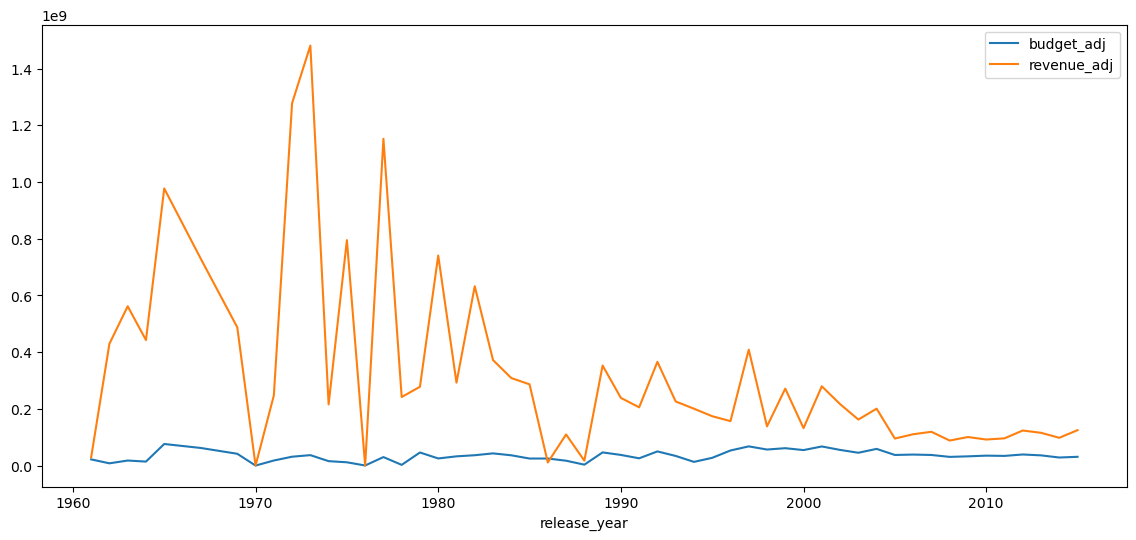

In [24]:
df.groupby('release_year')[['budget_adj', 'revenue_adj']].mean().plot(figsize=[14, 6])

## Reasoning:
### The budget and revenue trends chart illustrates how the average budget and revenue of movies have evolved over the years. From the chart, we can observe that the trend of mean budget and mean revenue is increasing over time. It's notable that there might be some years with significant differences between budget and revenue, which could indicate certain industry trends or economic factors influencing movie production.

### Research Question 3  (Relationship Between Popularity and Vote Average!)

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='popularity', y='vote_average', color='blue', alpha=0.6)
plt.title('Relationship Between Popularity and Vote Average')
plt.xlabel('Popularity')
plt.ylabel('Vote Average')
plt.grid()
plt.show()

## Reasoning:
## The scatter plot depicting the relationship between movie popularity and vote average allows us to explore whether highly popular movies tend to have higher or lower average votes. Interestingly, the plot shows no correlation between popularity and vote average. This suggests that while some highly popular movies have high average votes, there are also cases where popularity doesn't necessarily translate to higher votes.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])